In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

In [6]:
csv_train = '/content/drive/MyDrive/00. Universidad/02. Analisis de Datos/evento evaluativo 4/amazon_review_full_csv/train.csv'
#el csv no tiene nombres de columnas
df_train = pd.read_csv(csv_train, header=None)

In [7]:

csv_test = '/content/drive/MyDrive/00. Universidad/02. Analisis de Datos/evento evaluativo 4/amazon_review_full_csv/test.csv'
df_test = pd.read_csv(csv_test, header=None)

In [8]:
display(df_train.head())
display(df_test.head())

,0,1,2
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...


,0,1,2
0,1,mens ultrasheer,"This model may be ok for sedentary types, but ..."
1,4,Surprisingly delightful,This is a fast read filled with unexpected hum...
2,2,"Works, but not as advertised",I bought one of these chargers..the instructio...
3,2,Oh dear,I was excited to find a book ostensibly about ...
4,2,Incorrect disc!,"I am a big JVC fan, but I do not like this mod..."


In [9]:
#Agregar nombres de columnas a los datasets

df_train.columns = ['rating', 'title', 'review']
df_test.columns = ['rating', 'title', 'review']

In [10]:
display(df_train.head())
display(df_test.head())

,rating,title,review
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...


,rating,title,review
0,1,mens ultrasheer,"This model may be ok for sedentary types, but ..."
1,4,Surprisingly delightful,This is a fast read filled with unexpected hum...
2,2,"Works, but not as advertised",I bought one of these chargers..the instructio...
3,2,Oh dear,I was excited to find a book ostensibly about ...
4,2,Incorrect disc!,"I am a big JVC fan, but I do not like this mod..."


In [11]:
display(df_test.count())
display(df_train.count())

,0
rating,650000
title,649974
review,650000


,0
rating,3000000
title,2999812
review,3000000


In [12]:
# unir los datasets de train y test para preprocesamiento conjunto
df = pd.concat([df_train, df_test], ignore_index=True).copy()
display(df.head())

,rating,title,review
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...


In [13]:
df.count()


,0
rating,3650000
title,3649786
review,3650000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650000 entries, 0 to 3649999
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   rating  int64 
 1   title   object
 2   review  object
dtypes: int64(1), object(2)
memory usage: 83.5+ MB


In [15]:
df.describe()


,rating
count,3.650000e+06
mean,3.000000e+00
std,1.414214e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,4.000000e+00
max,5.000000e+00


In [16]:
df.rating.value_counts()

,count
rating,
3,730000
5,730000
4,730000
1,730000
2,730000


In [17]:
df.isnull().sum()


,0
rating,0
title,214
review,0


In [18]:
#ver el ranting de las reseñas que tienen valores nulos en la columna title
df[df['title'].isnull()].groupby('rating').size()


,0
rating,
1,44
2,53
3,48
4,36
5,33


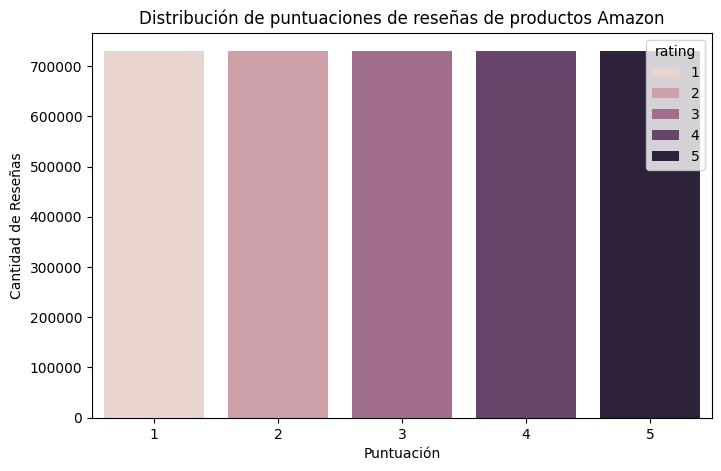

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df, hue='rating')
plt.title('Distribución de puntuaciones de reseñas de productos Amazon')
plt.xlabel('Puntuación')
plt.ylabel('Cantidad de Reseñas')
plt.show()

In [20]:
def clean_text(text):
# Convertir a minúsculas
    text = str(text).lower()

    # Eliminar textos entre corchetes (ej.: etiquetas)
    text = re.sub(r'\[.*?\]', '', text)

    # Eliminar URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Eliminar etiquetas HTML
    text = re.sub(r'<.*?>+', '', text)

    # Eliminar signos de puntuación
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Eliminar saltos de línea
    text = re.sub(r'\n', ' ', text)

    # Eliminar palabras que contienen números
    text = re.sub(r'\w*\d\w*', '', text)

    # Eliminar emojis y caracteres especiales (no ASCII)
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Eliminar espacios extras al inicio y final
    text = text.strip()

    return text

In [21]:
df['clean_title'] = df['title'].apply(clean_text)


In [22]:
df[['clean_title', 'title']].head(10)

,clean_title,title
0,more like funchuck,more like funchuck
1,inspiring,Inspiring
2,the best soundtrack ever to anything,The best soundtrack ever to anything.
3,chrono cross ost,Chrono Cross OST
4,too good to be true,Too good to be true
5,theres a reason for the price,There's a reason for the price
6,buyer beware,Buyer beware
7,errors but great story,"Errors, but great story"
8,the worst,The Worst!
9,oh please,Oh please


In [23]:
df['clean_review'] = df['review'].apply(clean_text)


In [25]:
df[['clean_review', 'review']].head(10)

,clean_review,review
0,gave this to my dad for a gag gift after direc...,Gave this to my dad for a gag gift after direc...
1,i hope a lot of people hear this cd we need mo...,I hope a lot of people hear this cd. We need m...
2,im reading a lot of reviews saying that this i...,I'm reading a lot of reviews saying that this ...
3,the music of yasunori misuda is without questi...,The music of Yasunori Misuda is without questi...
4,probably the greatest soundtrack in history us...,Probably the greatest soundtrack in history! U...
5,theres a reason this cd is so expensive even t...,"There's a reason this CD is so expensive, even..."
6,this is a selfpublished book and if you want t...,"This is a self-published book, and if you want..."
7,i was a dissapointed to see errors on the back...,I was a dissapointed to see errors on the back...
8,a complete waste of time typographical errors ...,A complete waste of time. Typographical errors...
9,i guess you have to be a romance novel lover f...,I guess you have to be a romance novel lover f...


In [ ]:
df.to_parquet(
    "/content/drive/MyDrive/00. Universidad/02. Analisis de Datos/evento evaluativo 4/clean_amazon_review_full.parquet",
    engine="pyarrow",
    compression="snappy",
    index=False
)